# The numpy.random package

In [21]:
import numpy as np

#### [ref: Ian's "rand function" video] Lets explore what results can be generated by this np.random.rand function - change the number & values to make different arrays:

In [22]:
np.random.rand(4,4,2)

array([[[0.63190632, 0.18533393],
        [0.1451957 , 0.43651168],
        [0.90637784, 0.84931605],
        [0.23986233, 0.18284139]],

       [[0.53853395, 0.84453287],
        [0.60711399, 0.10684991],
        [0.99757962, 0.81978649],
        [0.57530368, 0.74267694]],

       [[0.05557241, 0.19437473],
        [0.32375566, 0.76429092],
        [0.25658383, 0.5387455 ],
        [0.43431161, 0.18014096]],

       [[0.80496477, 0.78397656],
        [0.84148531, 0.86821329],
        [0.90731117, 0.43598179],
        [0.35888049, 0.44454246]]])

#### note that this function creates a 'uniform distribtion over [0, 1), meaning values from 0 up to but not incl. 1. thats coded in the use of the square bracket and round bracket. (see: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html#numpy.random.rand)


In [23]:
import matplotlib.pyplot as plt

#### to understand more about the distribution of random values generated by the np.random.rand function, lets use it generate a sample of values then plot them:

In [25]:
x = np.random.rand(10000)
x

array([0.62522956, 0.43743379, 0.02723614, ..., 0.97102331, 0.01912443,
       0.98488022])

(array([1030., 1005., 1052., 1006.,  986.,  984.,  991., 1022.,  944.,
         980.]),
 array([2.16968284e-05, 9.99792380e-02, 1.99936779e-01, 2.99894320e-01,
        3.99851862e-01, 4.99809403e-01, 5.99766944e-01, 6.99724485e-01,
        7.99682026e-01, 8.99639568e-01, 9.99597109e-01]),
 <a list of 10 Patch objects>)

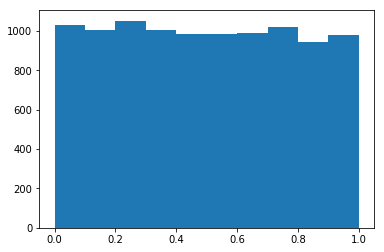

In [26]:
plt.hist(x)

#### nb: if the histogram doesn't appear, try adding 'plt.show()' to the above line. if that fails, try adding 'Xmatplotlib inline'

#### so - that's what a randomly generated uniform distribution looks like! uniform = every value in the range defined (eg: 0 to 0.9999*) has an equal chance of being picked.

In [8]:
s = np.random.uniform(-10,-9,10)
s

array([-9.20892405, -9.14107896, -9.59864099, -9.76580959, -9.08924469,
       -9.22148419, -9.29838844, -9.64663059, -9.98044271, -9.91508739])

#### so, trying out the np.random.uniform function, it seems that its very similar to the .rand function, in how it works

### ok. lets take a look at the 'numpy.random.normal' function. 

In [33]:
y = np.random.normal(0,0.1,1000)

(array([  2.,  22.,  60., 164., 235., 257., 165.,  68.,  24.,   3.]),
 array([-0.32437358, -0.25855666, -0.19273974, -0.12692282, -0.0611059 ,
         0.00471102,  0.07052794,  0.13634485,  0.20216177,  0.26797869,
         0.33379561]),
 <a list of 10 Patch objects>)

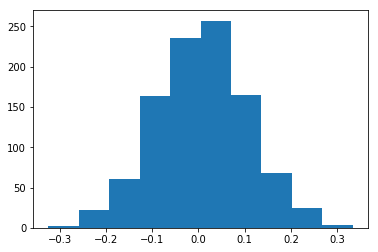

In [34]:
plt.hist(y)

so that looks more like a NORMAL distribution - where the chances of values close to zero being picked are greater than those at the extremities of the defined range.

NOTICE that its the 1st digit in np.random.normal (0,0.1,10000) which defines the MEAN in this distribution - in this case 0. You can make it any value you choose. Equally, the 2nd digit defines the intervals in the range.

### Now lets take a look at Random Number Generation, using numpy.random.RandomState

In [4]:
import numpy as np

In [12]:
z = np.random.RandomState([4])
z

## Bayes Theorem - a Simulation

In [2]:
import numpy as np
print(np.random.binomial(1,0.01))
# experiment runs once(1) with 1% prob of a positive result
# expect result will be zero 99 times out of 100

x = np.random.binomial(1, 0.01, 1000)
print(np.sum(x))
# now it runs 1,000 times,how often is the result positive?
# expect results to cluster around a mean of 10

0
14


### coding the simulation

In [3]:
# Helper function, returns True with probability P, False otherwise.\n",
def true_with_prob_p(p):
    return True if np.random.binomial(1, p) == 1 else False
    
    # Simulate the selection of a random person from the population.
    # Return True if they are a drug user, False otherwise.
    # True is returned with probability 0.005.
    
def select_random_person():
    return true_with_prob_p(0.005)\
    
    # Simulate the testing of a person from the population.
    # Return True if they test positive, False otherwise.
    # Non-users test positive with probability 0.01.
    # Users test positive with probability 0.99.
def test_person(user):
    if user:\
        return true_with_prob_p(0.99)
    else:
        return true_with_prob_p(0.01)
    
    # Run an experiment - take a random person from the population
    # and test whether or not they are positive.
def run_experiment():
    user = select_random_person()
    test = test_person(user)
    return (user, test)

In [4]:
# Run the experiment 10,000 times.
y = [run_experiment() for i in range(10000)]
# Count the number of users who tested positive.
user_and_positive = [True for i in y if i[0] == True and i[1] == True]

# Count the number of non-users who tested positive.
nonuser_and_positive = [True  for i in y if i[0] == False and i[1] == True]


In [15]:
np.sum(user_and_positive)

49

In [16]:
np.sum(nonuser_and_positive)

94

Text(0.5,1,'People who tested positive')

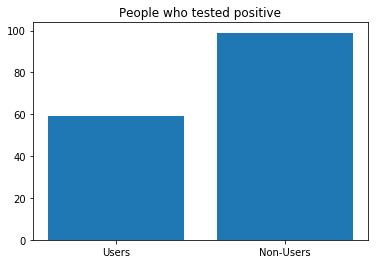

In [5]:
import matplotlib.pyplot as plt
plt.show()

plt.bar([0, 1], [np.sum(user_and_positive), np.sum(nonuser_and_positive)])
plt.xticks([0, 1], ('Users', ('Non-Users')))
plt.title("People who tested positive")